# WORK IN PROGRESS: 

Working with a rotated pole (RACMO data)

In [93]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfe
import pyproj

# Read in data

In [135]:
ds = xr.open_dataset('~/DATA/RACMO/racmo_sample.nc')

# Look at dataset we have just read in

In [134]:
ds.precip

<xarray.DataArray 'precip' (height: 1, rlat: 240, rlon: 262)>
array([[[1.061562e-05, 1.090497e-05, ..., 3.815836e-06, 4.014766e-06],
        [1.421444e-05, 1.249641e-05, ..., 3.237131e-06, 2.206313e-06],
        ...,
        [6.438093e-06, 7.902940e-06, ..., 7.450827e-06, 6.763615e-06],
        [5.316852e-06, 5.389190e-06, ..., 6.347671e-06, 6.582770e-06]]],
      dtype=float32)
Coordinates:
    lon      (rlat, rlon) float64 -126.9 -127.1 -127.3 -127.5 -127.7 -127.9 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float64 -32.75 -32.5 -32.25 -32.0 -31.75 -31.5 -31.25 ...
  * rlat     (rlat) float64 -30.0 -29.75 -29.5 -29.25 -29.0 -28.75 -28.5 ...
  * height   (height) float64 0.0

# Select precip 'Data variable' and squeeze to remove height (as it has a size of 1)

In [123]:
precip = ds.precip.squeeze()
precip

<xarray.DataArray 'precip' (time: 5, rlat: 240, rlon: 262)>
[314400 values with dtype=float32]
Coordinates:
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float64 -32.75 -32.5 -32.25 -32.0 -31.75 -31.5 -31.25 ...
  * rlat     (rlat) float64 -30.0 -29.75 -29.5 -29.25 -29.0 -28.75 -28.5 ...
    height   float64 0.0
  * time     (time) datetime64[ns] 2001-01-01 2001-01-02 2001-01-03 ...
Attributes:
    standard_name:  precipitation_flux
    long_name:      Total Precipitative Flux
    units:          kg m-2 s-1
    cell_methods:   time: 24-hr averaged values
    grid_mapping:   rotated_pole

# Project rotated grid onto lat-lon grid !!!

In [126]:
ds.rotated_pole

<xarray.DataArray 'rotated_pole' ()>
array(9.96921e+36, dtype=float32)
Attributes:
    grid_mapping_name:          rotated_latitude_longitude
    grid_north_pole_latitude:   -180.0
    grid_north_pole_longitude:  -170.0
    proj4_params:               -m 57.295779506 +proj=ob_tran +o_proj=latlon ...
    proj_parameters:            -m 57.295779506 +proj=ob_tran +o_proj=latlon ...
    projection_name:            rotated_latitude_longitude
    long_name:                  projection details
    EPSG_code:                  

In [124]:
p = pyproj.Proj('+proj=ob_tran +o_proj=latlon +o_lat_p=-180.0 +lon_0=10.0')

x1,y1 = np.meshgrid(ds.rlon.values[0], ds.rlat.values[0])

lon, lat = p(x1, y1)

x1, y1, lon, lat

(array([[-32.75]]),
 array([[-30.]]),
 array([[-0.86598621]]),
 array([[0.68922846]]))

# Plot map

Text(0.5, 1.0, 'My title \n')

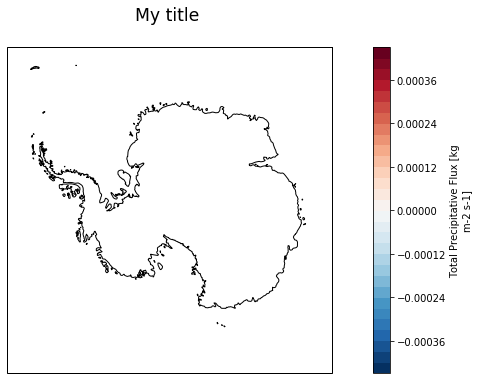

In [127]:
plt.figure(figsize=(15,6))

ax = plt.subplot( projection=ccrs.Stereographic(central_longitude=7., central_latitude=-90.) )

ax.set_extent([0,359,-80,-60], ccrs.PlateCarree())

precip.isel(time=1).plot.contourf('rlon', 'rlat', ax=ax, levels=30, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
# ax.gridlines(draw_labels=True)

# ax.add_feature(cfe.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='none', facecolor=cfe.COLORS['water']))
# ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_polys', '50m', edgecolor='LightGrey', 
#                                            facecolor='LightGrey', linewidth=0.2))
# ax.add_feature(cfe.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='k', facecolor='white', linewidth=0.5) )
# ax.add_feature(cfe.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '50m', edgecolor='k', facecolor='none',
#                                            linewidth=0.2))

ax.set_title('My title \n', size='xx-large')